# Problem 1

Recall that for the original GAN, the discriminator $f_\phi(x)$ is trained with the following optimization:

$$\max_\phi p(x) \log [f_\phi(x)] + q_\theta(x) \log [1 - f_\phi(x)]$$

where $p(x)$ is the true data distribution, $q_\theta(x)$ is the generator's learned distribution, and $f_\phi(x) \in [0, 1]$.

1. Assuming $q_\theta(x)$ is fixed, what is the solution to this optimization problem? "Solution" here means the function $f_\phi(x)$ that maximizes the above objective. Your expression should be in terms of $p(x)$ and $q_\theta(x)$.
1. Assume that $q_\theta(x) = p(x)$, i.e. the generator has learned to fit the data distribution perfectly. What is the optimal discriminator in this case?

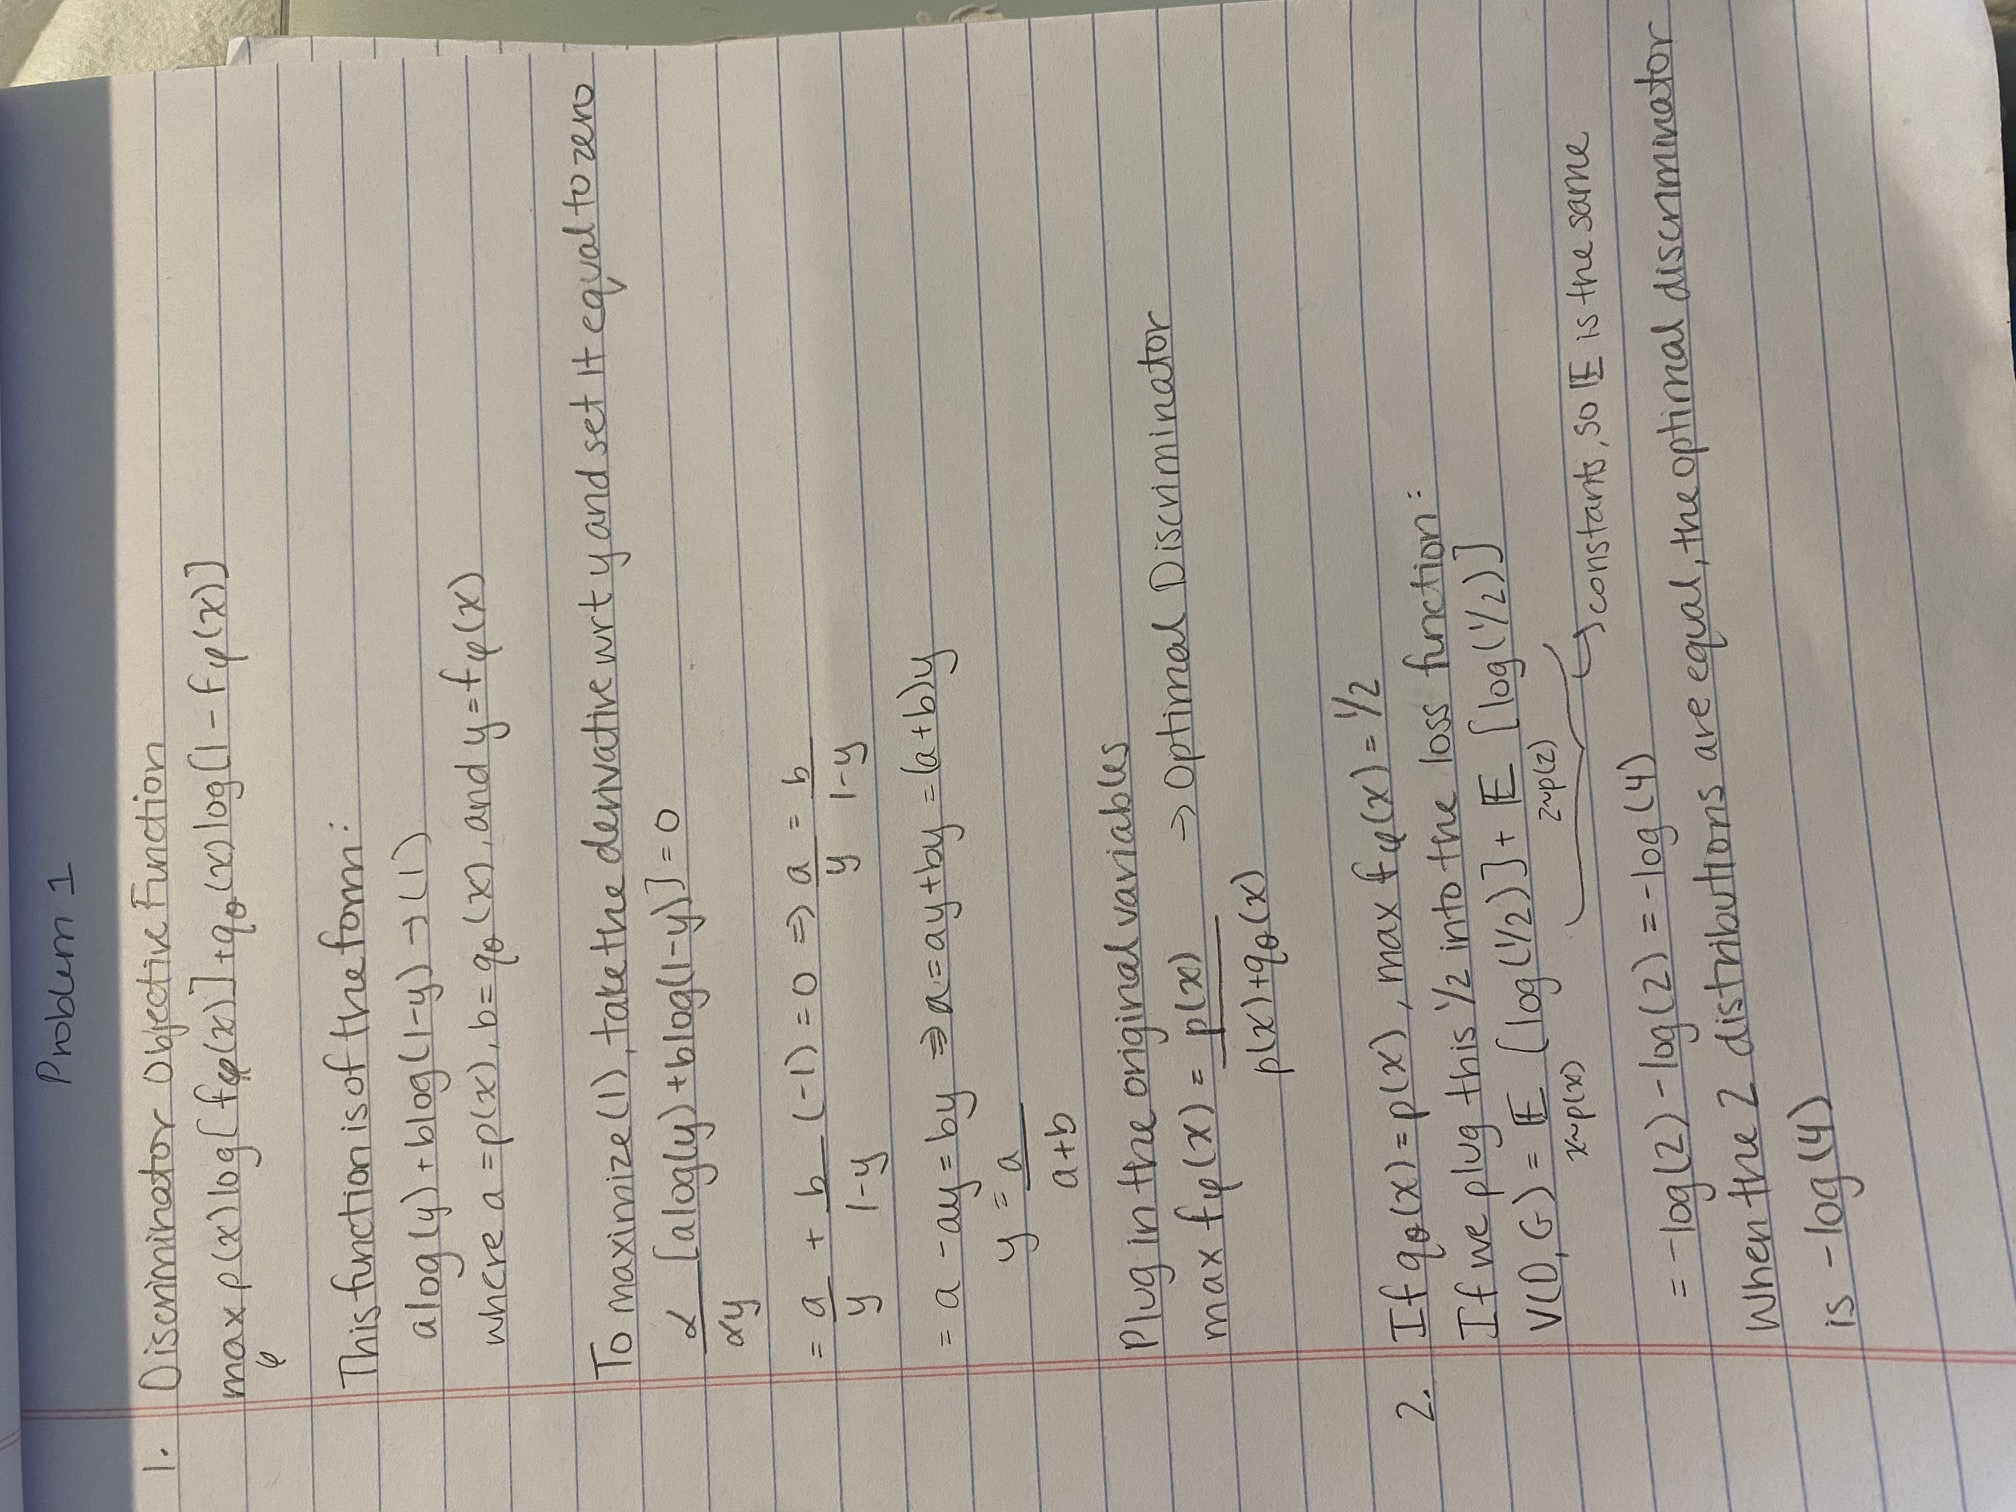

# Problem 2

Consider the following min-max optimization problem: $\min_x \max_y xy$.

1. Is there a stationary point to the function $xy$ (i.e. a point where $\frac{\partial xy}{\partial x} = 0$ and $\frac{\partial xy}{\partial y} = 0$)? If so, what is it?

1. Consider tackling this optimization problem with alternating gradient descent (i.e. alternatingly minimizing with respect to $x$ and maximizing with respect to $y$ using gradient descent). Assume that the learning rate is the same for both steps and that optimization begins from the point $x = 1, y = 1$. Will optimization reach a stationary point? Feel free to support your answer theoretically and/or empirically (i.e. by implementing it in code).


## Problem 2 Part 1

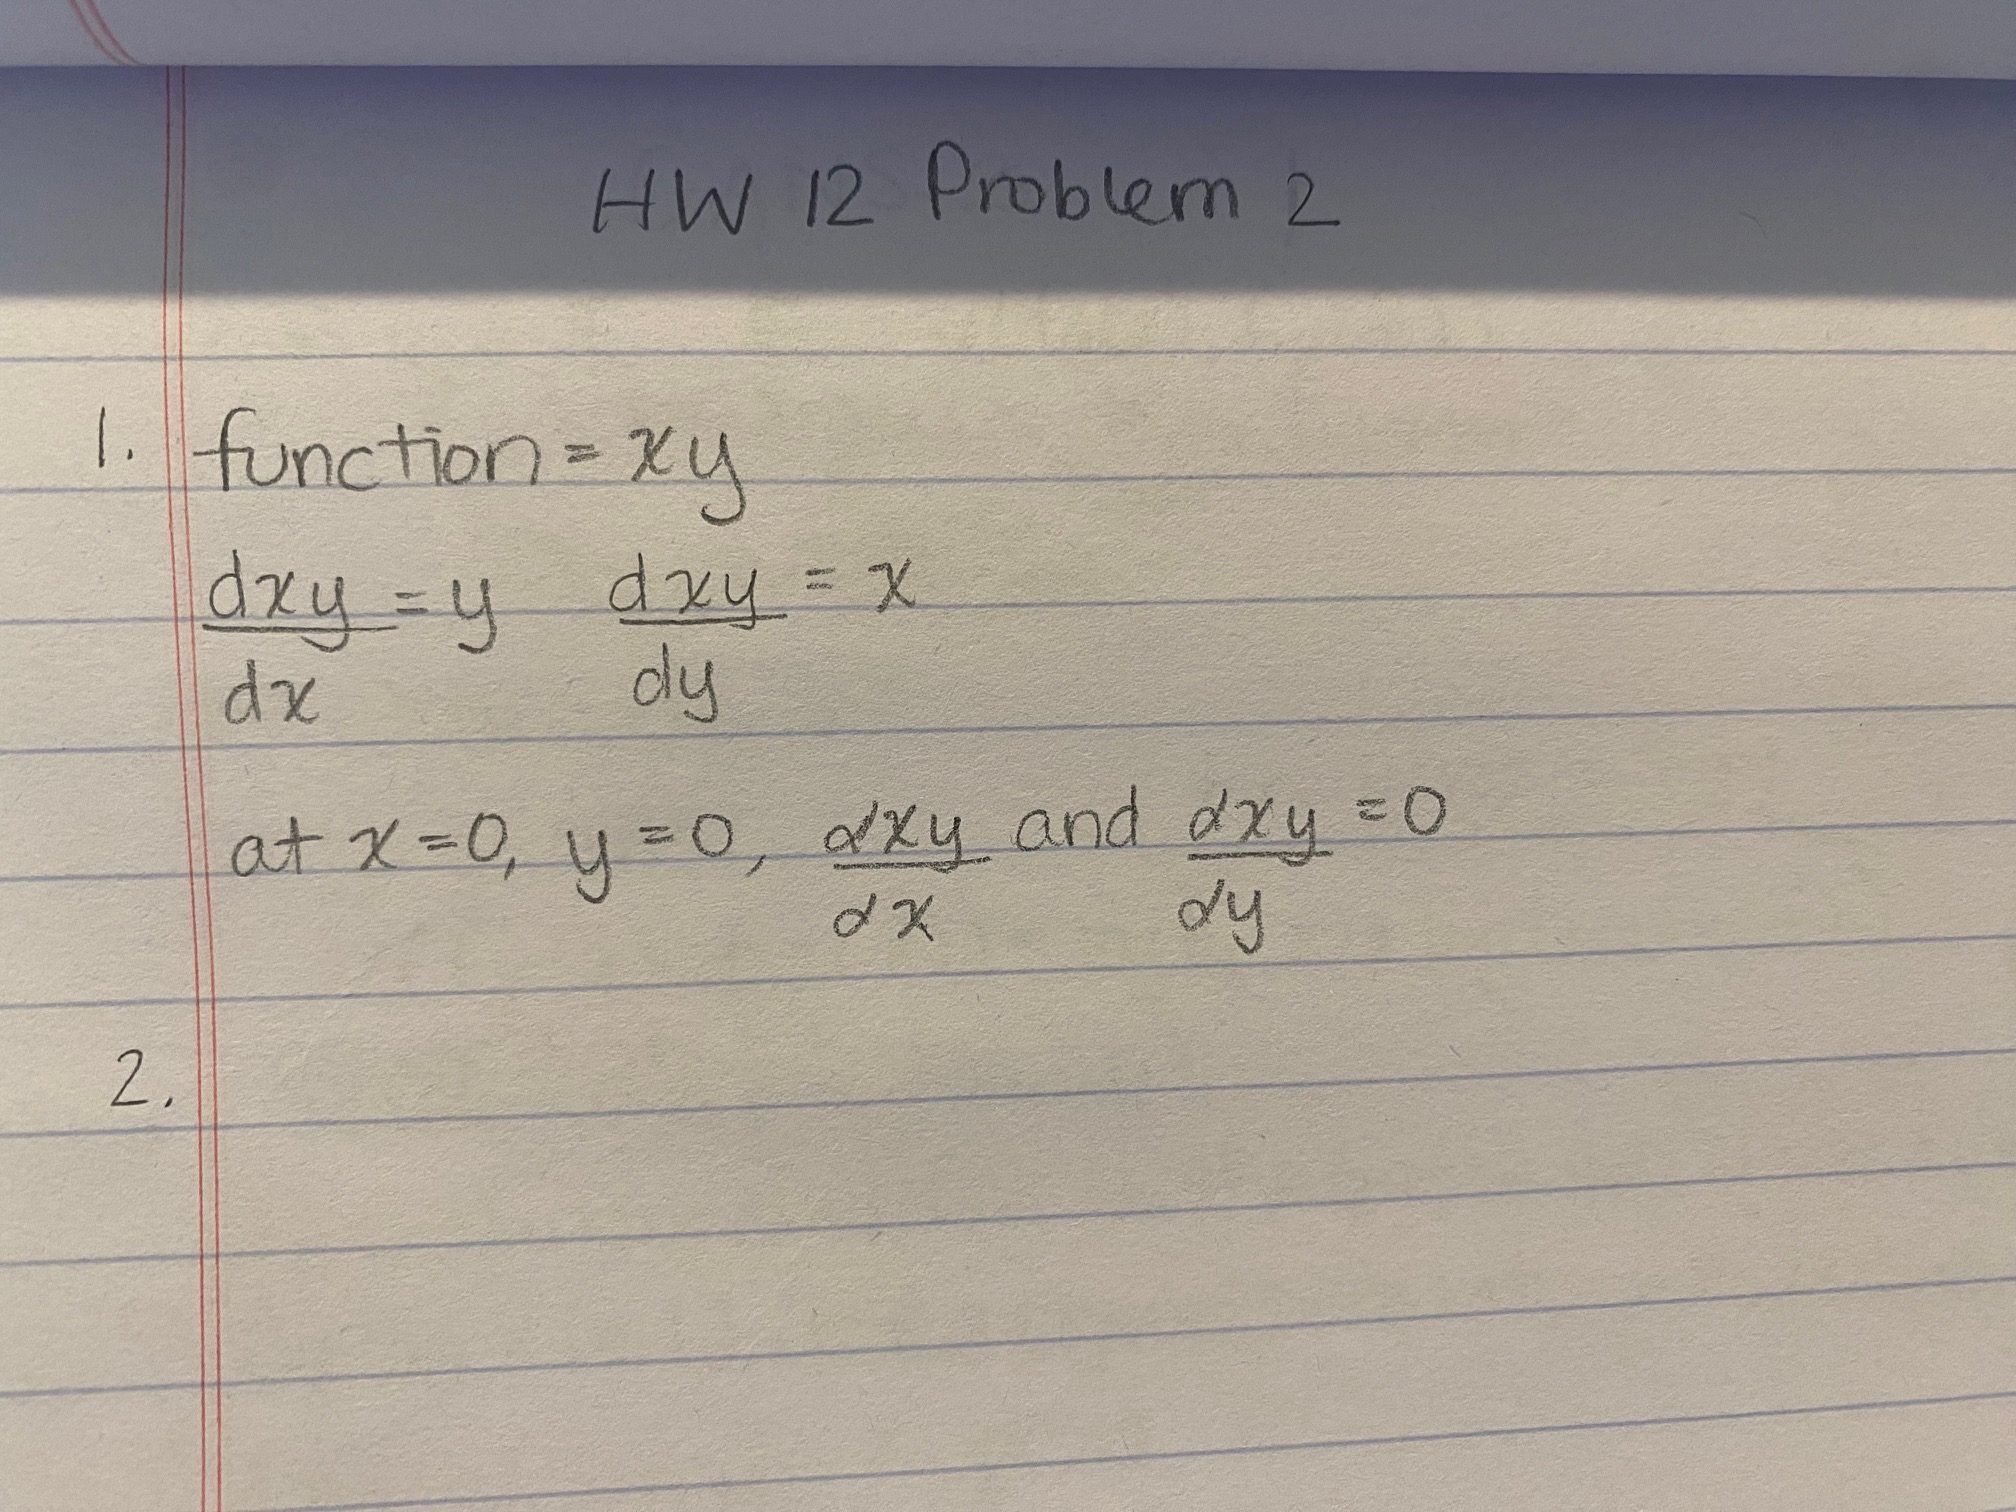

## Problem 2 Part 2:

In [ ]:
import numpy as np
from numpy.linalg import norm


def dfdx(x, y):
    return y

def dfdy(x, y):
    return x

def f(x, y):
    return x*y

def gradf(x, y):
    return np.array([dfdx(x, y), dfdy(x, y)])


def grad_ascent_descent(f, gradf, init_t, alpha):
    EPS = 1e-7
    prev_t = init_t - 10 * EPS
    t = init_t.copy()

    max_iter = 100000
    iter = 0
    while norm(t - prev_t) > EPS and iter < max_iter:
        prev_t = t.copy()
        #t[0] -= alpha * gradf(t[0], t[1])[0]
        #t[1] += alpha * gradf(t[0], t[1])[1]
        t[0] -= alpha * dfdx(t[0], t[1])
        t[1] += alpha * dfdy(t[0], t[1])
        print (t)
        iter += 1

    return t

t = grad_ascent_descent(f, gradf, np.array([1.0,1.0]), 0.001)
print(t)

Streaming output truncated to the last 5000 lines.
[0.04442156 1.41318417]
[0.04300838 1.41322718]
[0.04159515 1.41326877]
[0.04018188 1.41330896]
[0.03876858 1.41334772]
[0.03735523 1.41338508]
[0.03594184 1.41342102]
[0.03452842 1.41345555]
[0.03311497 1.41348867]
[0.03170148 1.41352037]
[0.03028796 1.41355065]
[0.02887441 1.41357953]
[0.02746083 1.41360699]
[0.02604722 1.41363304]
[0.02463359 1.41365767]
[0.02321993 1.41368089]
[0.02180625 1.4137027 ]
[0.02039255 1.41372309]
[0.01897882 1.41374207]
[0.01756508 1.41375963]
[0.01615132 1.41377578]
[0.01473755 1.41379052]
[0.01332375 1.41380385]
[0.01190995 1.41381576]
[0.01049614 1.41382625]
[0.00908231 1.41383533]
[0.00766847 1.413843  ]
[0.00625463 1.41384926]
[0.00484078 1.4138541 ]
[0.00342693 1.41385753]
[0.00201307 1.41385954]
[5.99210018e-04 1.41386014e+00]
[-8.14650119e-04  1.41385932e+00]
[-0.00222851  1.41385709]
[-0.00364237  1.41385345]
[-0.00505622  1.4138484 ]
[-0.00647007  1.41384193]
[-0.00788391  1.41383404]
[-0.00929

# As seen through the code, there will never be a stationary point where both derivatives are equal to each other. X is descending and Y is ascending in different directions.

# Problem 3

The code below is taken from [the example in the textbook](http://d2l.ai/chapter_generative-adversarial-networks/gan.html). I've modified the example so that the true data distribution is a mixture of two Gaussians rather than a single Gaussian. Feel free to use the Pytorch code in this problem instead, but make sure you keep my modification to the data distribution.

The code below uses the original GAN loss. A somewhat popular alternative loss function is the ["Least-Squares GAN (LS-GAN)"](https://arxiv.org/pdf/1611.04076.pdf), which is defined as follows:

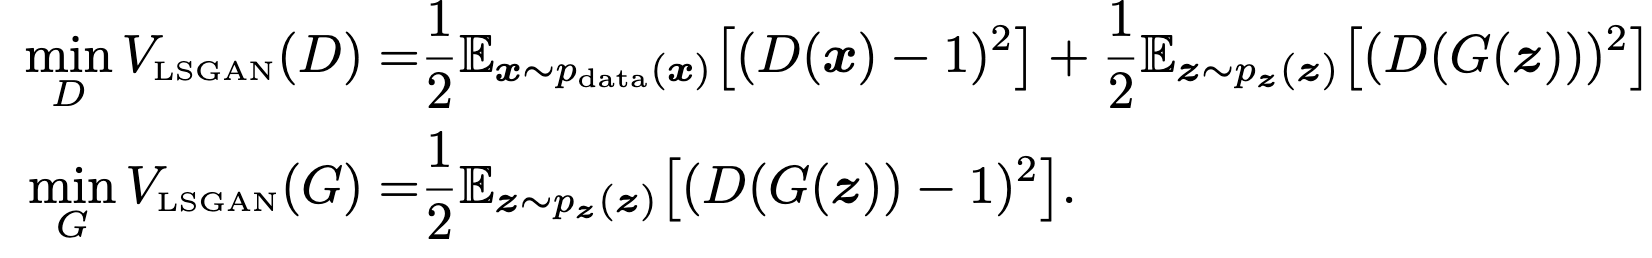

Modify the code so that it uses the LS-GAN objective instead of the original GAN objective. Does it converge to a different solution?

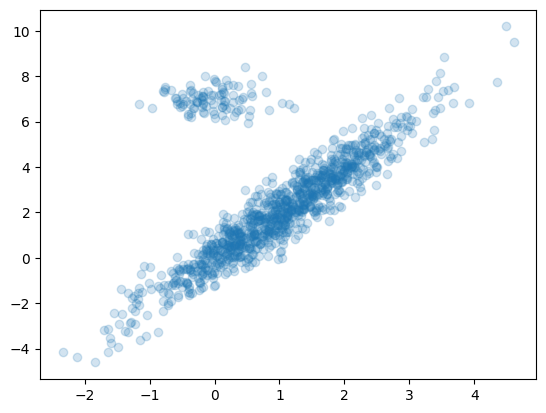

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch import nn

# Do not change this part! It is different from the example in the textbook.
X = np.random.normal(0.0, 1, (1000, 2))
A = np.array([[1, 2], [-0.1, 0.5]])
b = np.array([1, 2])
data = np.concatenate([np.dot(X, A) + b, np.random.normal(0.0, 0.5, (100, 2)) + np.array([0, 7])], 0)
np.random.shuffle(data)
data = torch.tensor(data, dtype=torch.float32)
plt.scatter(data[:, 0].numpy(), data[:, 1].numpy(), alpha=0.2)

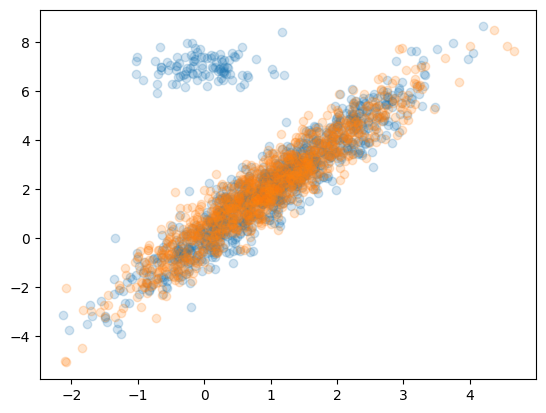

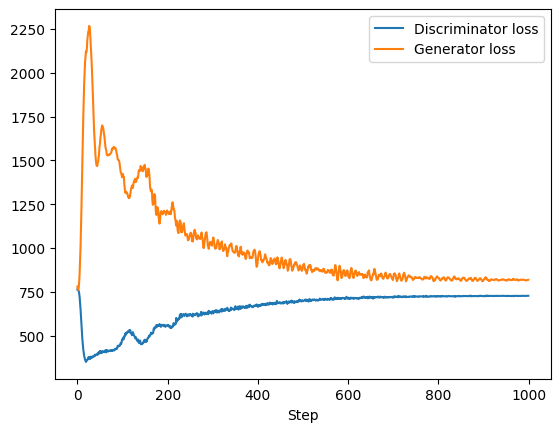

In [ ]:
net_G = nn.Sequential(nn.Linear(2, 2))

net_D = nn.Sequential(
    nn.Linear(2, 5), nn.Tanh(),
    nn.Linear(5, 3), nn.Tanh(),
    nn.Linear(3, 1))

def update_D(X, Z, net_D, net_G, loss, trainer_D):
    """Update discriminator."""
    batch_size = X.shape[0]
    ones = torch.ones((batch_size,), device=X.device)
    zeros = torch.zeros((batch_size,), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    # Do not need to compute gradient for `net_G`, detach it from
    # computing gradients.
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones.reshape(real_Y.shape)) +
              loss(fake_Y, zeros.reshape(fake_Y.shape))) / 2
    loss_D.backward()
    trainer_D.step()
    return loss_D

def update_G(Z, net_D, net_G, loss, trainer_G):
    """Update generator."""
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    # We could reuse `fake_X` from `update_D` to save computation
    fake_X = net_G(Z)
    # Recomputing `fake_Y` is needed since `net_D` is changed
    fake_Y = net_D(fake_X)
    loss_G = loss(fake_Y, ones.reshape(fake_Y.shape))
    loss_G.backward()
    trainer_G.step()
    return loss_G

def train(net_D, net_G, num_steps, lr_D, lr_G, latent_dim, data):
    loss = nn.BCEWithLogitsLoss(reduction='sum')
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G)
    losses_D, losses_G = [], []
    for epoch in range(num_steps):
        batch_size = data.shape[0]
        Z = torch.normal(0, 1, size=(batch_size, latent_dim))
        losses_D.append(update_D(data, Z, net_D, net_G, loss, trainer_D).detach().numpy())
        losses_G.append(update_G(Z, net_D, net_G, loss, trainer_G).detach().numpy())
    # Visualize generated examples
    Z = torch.normal(0, 1, size=(1000, latent_dim))
    fake_X = net_G(Z).detach().numpy()
    plt.figure()
    plt.scatter(data.detach().numpy()[:, 0], data.detach().numpy()[:, 1], alpha=0.2)
    plt.scatter(fake_X[:, 0], fake_X[:, 1], alpha=0.2)
    plt.figure()
    plt.plot(losses_D, label="Discriminator loss")
    plt.plot(losses_G, label="Generator loss")
    plt.legend()
    plt.xlabel("Step")

lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005, 2, 1000
train(net_D, net_G, num_epochs, lr_D, lr_G, latent_dim, data)

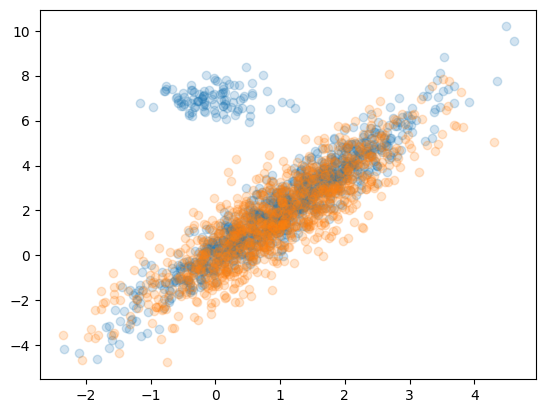

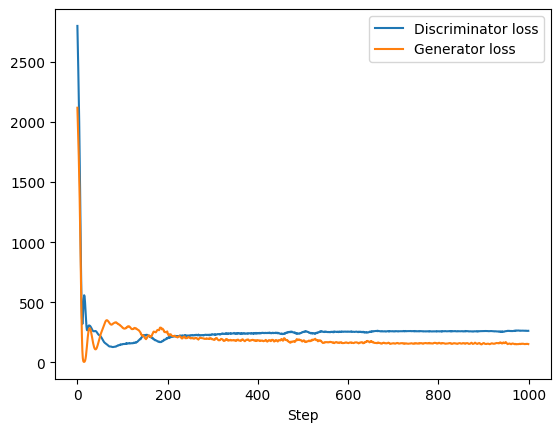

In [ ]:
net_G = nn.Sequential(nn.Linear(2, 2))

net_D = nn.Sequential(
    nn.Linear(2, 5), nn.Tanh(),
    nn.Linear(5, 3), nn.Tanh(),
    nn.Linear(3, 1))

def update_D(X, Z, net_D, net_G, loss, trainer_D):
    """Update discriminator."""
    batch_size = X.shape[0]
    ones = torch.ones((batch_size,), device=X.device)
    zeros = torch.zeros((batch_size,), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    # Do not need to compute gradient for `net_G`, detach it from
    # computing gradients.
    fake_Y = net_D(fake_X.detach())

    #original code
    #loss_D = (loss(real_Y, ones.reshape(real_Y.shape)) + loss(fake_Y, zeros.reshape(fake_Y.shape))) / 2

    #first try
    #loss_D = torch.mean(torch.pow(real_Y - 1, 2)) + torch.mean(torch.pow(fake_Y, 2))
    #loss_D *= 0.5

    #second try
    loss_fake = loss(fake_Y, torch.ones_like(fake_Y))
    loss_real = loss(real_Y - 1, torch.ones_like(real_Y))
    loss_D = .5 * (loss_fake + loss_real)
    
    
    loss_D.backward()
    trainer_D.step()
    return loss_D

def update_G(Z, net_D, net_G, loss, trainer_G):
    """Update generator."""
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    # We could reuse `fake_X` from `update_D` to save computation
    fake_X = net_G(Z)
    # Recomputing `fake_Y` is needed since `net_D` is changed
    fake_Y = net_D(fake_X)

    #original code
    #loss_G = loss(fake_Y, ones.reshape(fake_Y.shape))

    #first try
    #loss_G = torch.mean(torch.pow(fake_Y - 1, 2)) * 0.5

    #second try
    loss_G = .5 * loss(fake_Y - 1, torch.ones_like(fake_Y))

    loss_G.backward()
    trainer_G.step()
    return loss_G

def train(net_D, net_G, num_steps, lr_D, lr_G, latent_dim, data):

    #original code
    #loss = nn.BCEWithLogitsLoss(reduction='sum')

    #first/second try
    loss = nn.MSELoss(reduction = "sum")
    
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G)
    losses_D, losses_G = [], []
    for epoch in range(num_steps):
        batch_size = data.shape[0]
        Z = torch.normal(0, 1, size=(batch_size, latent_dim))
        losses_D.append(update_D(data, Z, net_D, net_G, loss, trainer_D).detach().numpy())
        losses_G.append(update_G(Z, net_D, net_G, loss, trainer_G).detach().numpy())
    # Visualize generated examples
    Z = torch.normal(0, 1, size=(1000, latent_dim))
    fake_X = net_G(Z).detach().numpy()
    plt.figure()
    plt.scatter(data.detach().numpy()[:, 0], data.detach().numpy()[:, 1], alpha=0.2)
    plt.scatter(fake_X[:, 0], fake_X[:, 1], alpha=0.2)
    plt.figure()
    plt.plot(losses_D, label="Discriminator loss")
    plt.plot(losses_G, label="Generator loss")
    plt.legend()
    plt.xlabel("Step")

lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005, 2, 1000
train(net_D, net_G, num_epochs, lr_D, lr_G, latent_dim, data)

# The LS-GAN method converges to a different solution. The loss is significantly lower than the original GAN loss for both the Discriminator and the Generator. The original GAN converges around the 600th - 800th step. The LS-GAN converges much sooner close to the 200th step, and the loss remains steady, so LS-GAN seems more stable than original GAN.